# Principal component analysis on flower species

Data Set Information:\
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.
Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: Iris Setosa , Iris Versicolour, Iris Virginica

In [1]:
#pip install jupyter-datatables

- Importing libraries

In [2]:
# getting the necessary libraries..
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
from jupyter_datatables import init_datatables_mode

init_datatables_mode()

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

<JupyterRequire.display.SafeScript object>

- Load dataset

In [5]:
# load dataset into Pandas df
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
flower_df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

flower_df.head(n=10)

<JupyterRequire.display.SafeScript object>

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
#info of df
flower_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']# Separating out the features
x = flower_df.loc[:, features].values# get features
y = flower_df.loc[:,['target']].values# separating features from label

x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2) #dimension reduction
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])


final_Df = pd.concat([principalDf, flower_df[['target']]], axis = 1)
final_Df.head()

<JupyterRequire.display.SafeScript object>

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


In [8]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder() 
# Encode labels in column 'species'.
final_Df.target= label_encoder.fit_transform(final_Df.target) #final_Df['target'])
#display unique lists in specie attribute
final_Df.target.unique()

array([0, 1, 2])

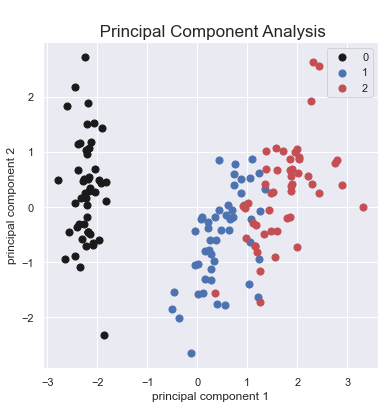

In [9]:
# visualize results
sns.set()
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot()
ax.set_xlabel('principal component 1', fontsize = 12)
ax.set_ylabel('principal component 2', fontsize = 12)
ax.set_title('\n Principal Component Analysis', fontsize = 17)

targets = [0, 1, 2]
colors = ['k', 'b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = final_Df['target'] == target
    ax.scatter(final_Df.loc[indicesToKeep, 'principal component 1']
               , final_Df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
#ax.grid()
plt.show()

- Extra

# An approach for feature selection in machine learning using the iris-dataset

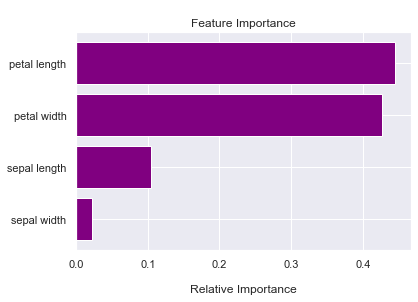

In [10]:
from sklearn.ensemble import RandomForestClassifier

features = np.array(['sepal length', 'sepal width', 'petal length', 'petal width'])
clf = RandomForestClassifier()
clf.fit( flower_df[features], flower_df.target)

# make the calculated importances, order them from most important to least important
# make a horizontal barplot to visualize what is important or not
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)
padding = np.arange(len(features)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center',color='purple')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("\nRelative Importance")
plt.title("\nFeature Importance")
plt.show()